In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, recall_score

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
test_id = test[['PassengerId']]

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

data['Surname'] = data['Name'].apply(lambda x: x.split(',')[0])
test['Surname'] = test['Name'].apply(lambda x: x.split(',')[0])

In [11]:
def drop_columns(df):
    
    df.drop(columns = ['PassengerId', 'Cabin', 'Ticket', 'Name', 'Pclass'], axis =1, inplace = True)


drop_columns(data)
drop_columns(test)

In [12]:
def fill_values(df):
    df['Age'] = np.where(df['Age'] < 10, 10, df['Age'])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Age'] = df['Age'].astype('int64')
    df['Fare'] = df['Fare'].fillna(np.mean(df['Fare']))
    
fill_values(data)
fill_values(test)

In [13]:
test.describe()

,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,30.492823,0.447368,0.392344,35.627188
std,12.058459,0.896760,0.981429,55.840500
min,10.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,30.000000,0.000000,0.000000,14.454200
75%,35.750000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [14]:
lower_limit = np.quantile(test['Fare'], .1)
upper_limit = np.quantile(test['Fare'], .9)
print(upper_limit, lower_limit)

79.2 7.64376


In [15]:
def outliers_fixing(df, feature):
    lower_limit = np.quantile(df[feature], .1)
    upper_limit = np.quantile(df[feature], .9)
    print(upper_limit, lower_limit)

    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])

    return df
    
data = outliers_fixing(data, 'Age')
data = outliers_fixing(data, 'Fare')
test = outliers_fixing(test, 'Age')
test = outliers_fixing(test, 'Fare')

47.0 16.0
77.9583 7.55
48.0 18.0
79.2 7.64376


<Axes: >

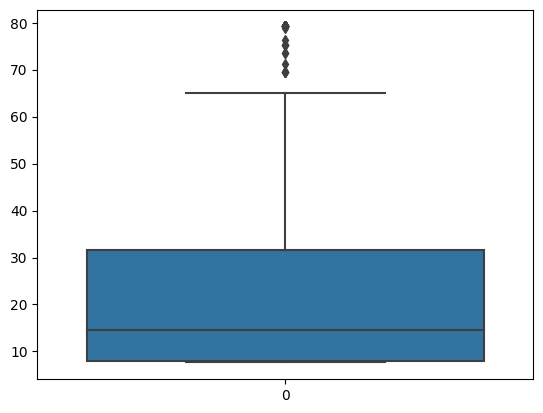

In [16]:
sn.boxplot(test['Fare'])

<Axes: xlabel='Embarked', ylabel='Fare'>

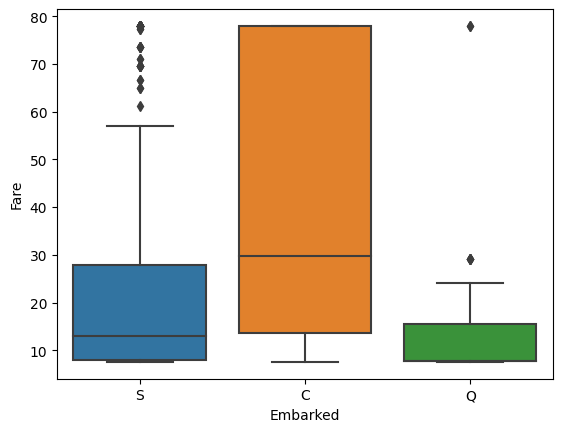

In [17]:
sn.boxplot(data = data, x = 'Embarked', y = 'Fare')

In [18]:
def label_encode(df, features):
    le = LabelEncoder()
    for feature in features:
        df[feature] = le.fit_transform(df[feature])

In [19]:
features = ['Embarked', 'Sex']
label_encode(data, features)
label_encode(test, features)

In [20]:
def scale(df, features):
    for feature in features:
        scaler = MinMaxScaler()
        df[feature] = scaler.fit_transform(df[[feature]])

In [21]:
features = ['Age', 'Fare']
scale(data, features)
scale(test, features)

In [22]:
X = data.drop(['Survived', 'SibSp'], axis =1)
test = test.drop(['SibSp'], axis = 1)
y = data['Survived']

<Axes: >

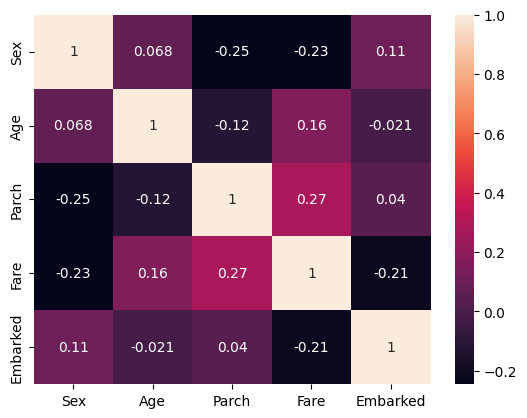

In [23]:
sn.heatmap(X.corr(), annot = True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 5)

In [25]:
Grid_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'lbfgs']}

model = LogisticRegression(max_iter= 100)
grid_search = GridSearchCV(model, Grid_parameters, cv = 5, scoring = 'accuracy')


In [26]:
grid_search.fit(X_train, y_train)

C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Us

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [27]:
best_params = grid_search.best_params_
best_params

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [28]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1)

In [29]:
y_pred = best_model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8116591928251121


In [31]:
print(confusion_matrix(y_test, y_pred))

[[124  16]
 [ 26  57]]


In [32]:
test_pred = best_model.predict(test)
test_pred_df = pd.DataFrame(test_pred, columns = ['Survived'])

In [33]:
pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
submission_pred = pd.concat([test_id, test_pred_df], axis =1)
submission_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


submission_pred.to_csv('Sub_file.csv', index =False )